In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Learn_AI\Model\Unsupervised_Learning\Data\Country-data.csv')

In [3]:
df.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [6]:
df_ve = df.copy()
df_ve.head(2)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090


In [7]:
df_ve.drop('country' , axis =1 , inplace = True)

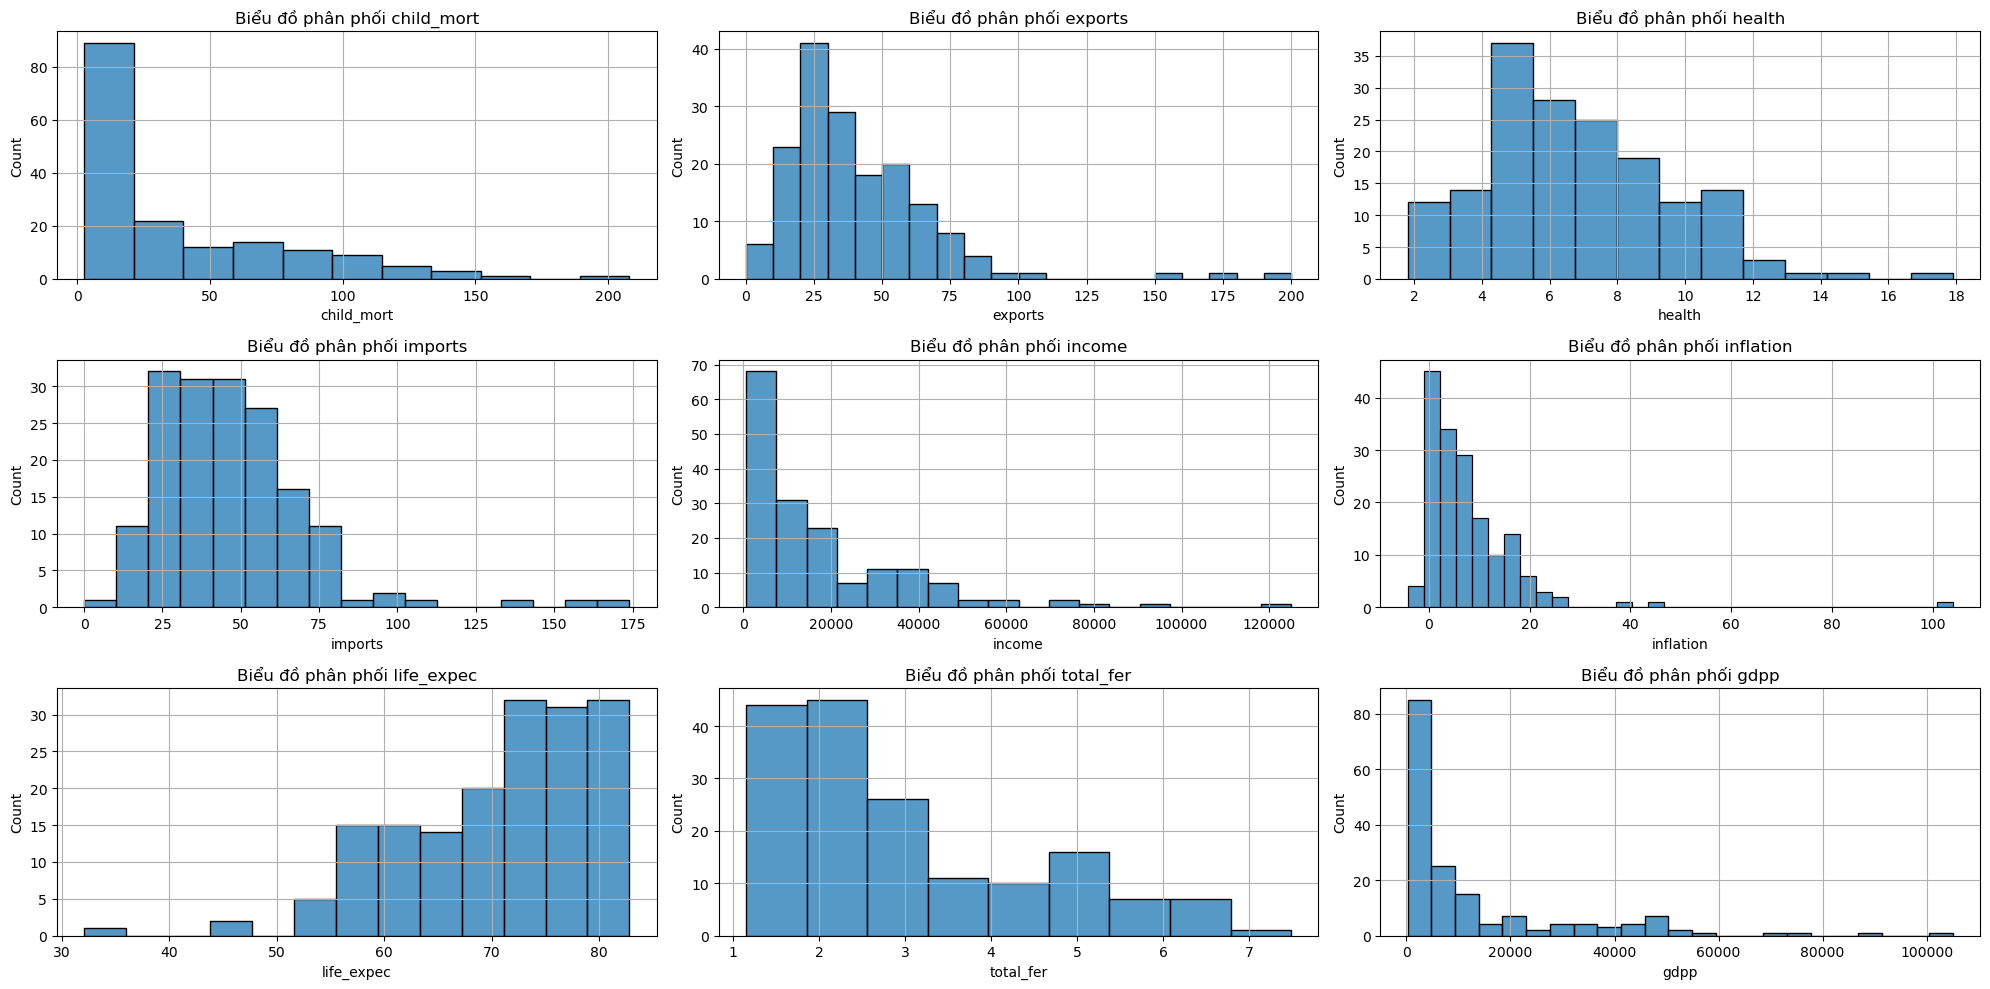

In [8]:
cols = df_ve.columns 
cols_ve = 3
rows_ve = len(cols) // cols_ve 
fig , axe = plt.subplots(rows_ve , cols_ve , figsize = (20,10))

for y in range(rows_ve):
    for x in range(cols_ve):
        axes = axe[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.histplot(X , ax = axes)
        axes.grid()
        title = X.name
        axes.set_title(f'Biểu đồ phân phối {title}')
plt.tight_layout()

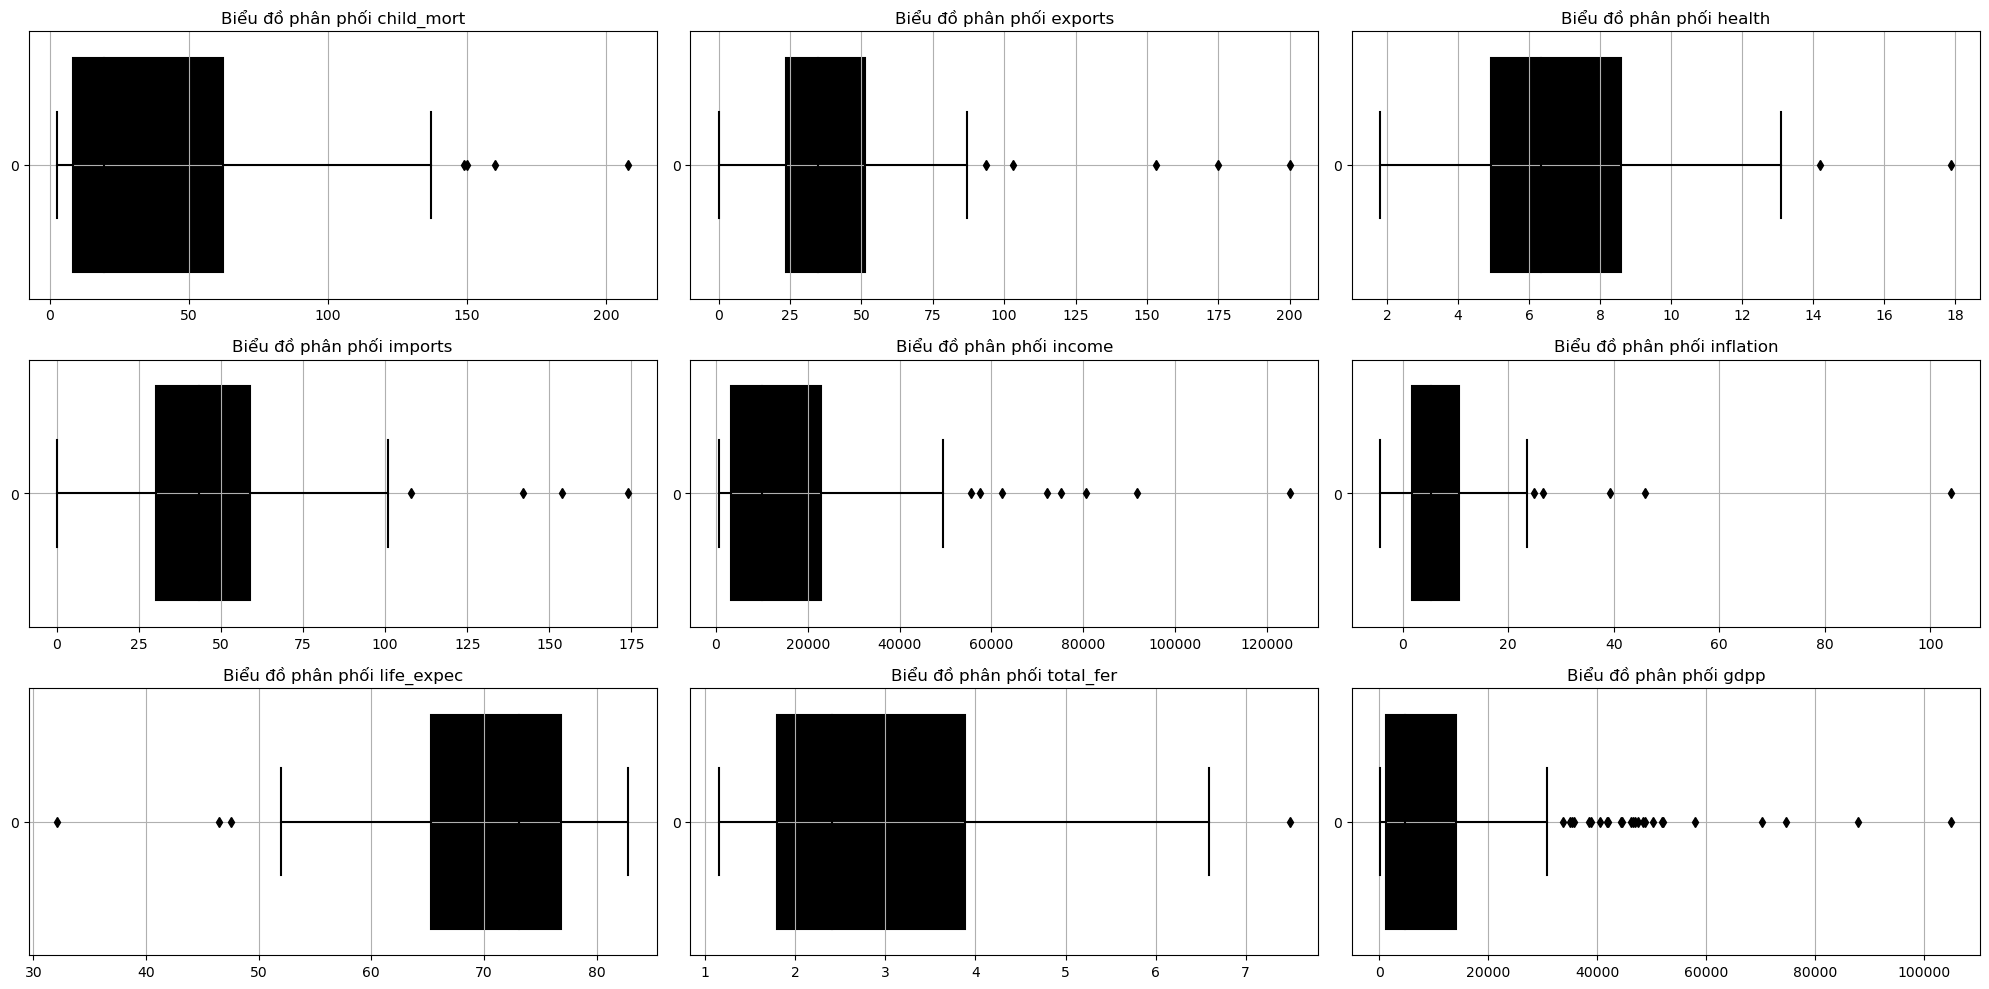

In [9]:
cols = df_ve.columns 
cols_ve = 3
rows_ve = len(cols) // cols_ve 
fig , axe = plt.subplots(rows_ve , cols_ve , figsize = (20,10))

for y in range(rows_ve):
    for x in range(cols_ve):
        axes = axe[y , x]
        X = df_ve.iloc[: , y * cols_ve + x]
        sns.boxplot(X , ax = axes , orient='h' , color = 'black')
        axes.grid()
        title = X.name
        axes.set_title(f'Biểu đồ phân phối {title}')
plt.tight_layout()

- Phân bố dữ liệu:
- "Health" gần với phân phối chuẩn, với đỉnh ở khoảng 2-3.
 - "Life expectancy" lệch trái, với đỉnh ở khoảng 70.
- Các chỉ số còn lại (child mortality, exports, imports, income, inflation, total fertility, GDP) đều lệch phải, với đỉnh ở mức thấp và đuôi dài về giá trị cao.
- Tình trạng kinh tế và xã hội:
 - Thu nhập bình quân đầu người ở mức rất thấp (đỉnh gần 0, phần lớn dưới 2000).
 - Sự giàu có của quốc gia thấp (GDP tập trung ở mức thấp, đỉnh gần 0).
 - Của cải và thu nhập phân bổ không công bằng (phân bố lệch phải mạnh với giá trị ngoại lệ cao).
 - Mức sống có thể thấp do thu nhập và tuổi thọ không đồng đều.

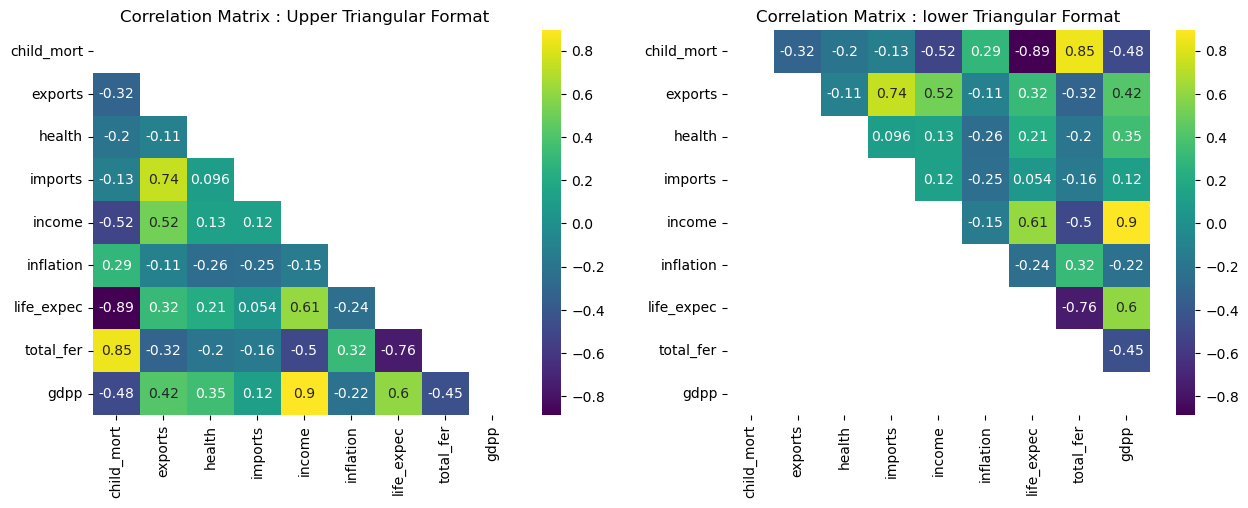

In [10]:
upper_triangle = np.triu(df_ve.corr())
lower_triangle = np.tril(df_ve.corr())

fig , ax = plt.subplots(1 , 2 , figsize=  (15,5))
plt.subplot(1,2,1 )
sns.heatmap(df_ve.corr() , cmap = 'viridis' , annot= True , mask = upper_triangle , cbar = True)
plt.title('Correlation Matrix : Upper Triangular Format')

plt.subplot(1,2,2 )
sns.heatmap(df_ve.corr() , cmap = 'viridis' , annot= True , mask = lower_triangle , cbar = True)
plt.title('Correlation Matrix : lower Triangular Format')
plt.show()

- Tỷ lệ trẻ tư vong cao khi mà income , life_expec , gdpp , export giảm , inflation tăng làm tỷ lệ sinh tử vong tăng . Điều kiện kinh tế ảnh hưởng 1 cách nghiêm trọng 
- inflantion tăng làm tỷ lệ tử vong và tỉ lệ sinh cao =>> quốc gia lạc hậu 
- export tăng thì gdpp , import cũng tăng , life_expec tăng và tỷ lệ sinh và tử giảm =>> xuất nhập khẩu đón vai trò quan trọn 
* =>>> 3 feature chính có thể đánh giá được 1 quốc gia có thể suy ra là 
- health , trade , finance 


In [11]:
df1 = pd.DataFrame()
df1['Trade'] = (df['imports'] / df['imports'].mean()) + (df['exports'] / df['exports'].mean())
df1['Health'] = (df['child_mort'] / df['child_mort'].mean()) + (df['health'] / df['health'].mean()) + (df['life_expec'] / df['life_expec'].mean()) + (df['total_fer'] / df['total_fer'].mean())
df1['Finance'] = (df['income'] / df['income'].mean()) + (df['inflation'] / df['inflation'].mean()) + (df['gdpp'] / df['gdpp'].mean())
df1.head()

,Trade,Health,Finance
0,1.200812,6.239852,1.349645
1,1.717580,3.035901,1.471658
2,1.603752,3.389763,3.165367
3,2.430387,6.469020,3.494919
4,2.362940,2.964898,2.240150


# Chuẩn hóa dữ liệu 

In [12]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler  
mms = MinMaxScaler()
sds  = StandardScaler()

df1['Health'] = mms.fit_transform(df1[['Health']])
df1['Trade'] = mms.fit_transform(df1[['Trade']])
df1['Finance'] = mms.fit_transform(df1[['Finance']])

df1 = df[['country']].merge(df1, left_index=True, right_index=True )

In [13]:
df1.rename(columns = {'country' : 'Country'} , inplace = True)

# Apply PCA 

In [14]:
df2 = df.copy(deep = True)

df2['health'] = sds.fit_transform(df2[['health']])

df2.drop('country' , axis = 1 , inplace = True)

for i in df2.columns : 
    if i != 'health' : 
        df2[i] = mms.fit_transform(df2[[i]])

df2.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.279088,0.257765,0.008047,0.126144,0.475345,0.736593,0.003073
1,0.068160,0.139531,-0.097016,0.279037,0.074933,0.080399,0.871795,0.078864,0.036833
2,0.120253,0.191559,-0.966073,0.180149,0.098809,0.187691,0.875740,0.274448,0.040365
3,0.566699,0.311125,-1.448071,0.246266,0.042535,0.245911,0.552268,0.790221,0.031488
4,0.037488,0.227079,-0.286894,0.338255,0.148652,0.052213,0.881657,0.154574,0.114242


In [15]:
from sklearn.decomposition import PCA 
pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([1.01740511, 0.13090418, 0.03450018, 0.02679822, 0.00979752,
       0.00803398, 0.00307055, 0.00239976, 0.00179388])

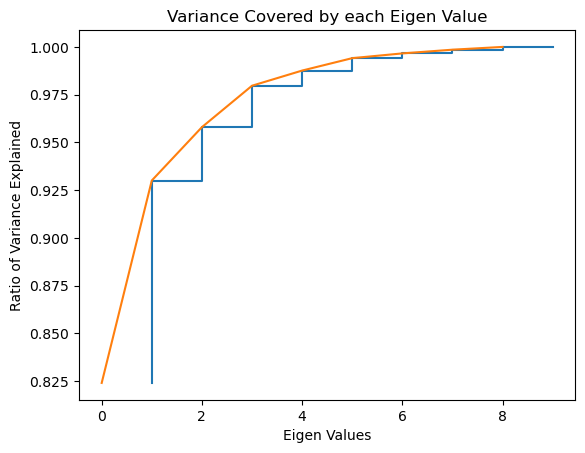

In [16]:
plt.step(list(range(1,10)) , np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

- k = 2 có thể giải thích được hơn 92% phương sai =>> chọn

In [17]:
pca_df2 = pca_df2[[0,1,2]]
pca_df2.head()

,0,1,2
0,0.220482,0.640048,0.086112
1,-0.080903,-0.172000,-0.208695
2,-0.961283,-0.125199,-0.126719
3,-1.505914,0.472144,0.284978
4,-0.264724,-0.237308,-0.059150


In [18]:
x1 = df1.drop(columns = ['Country']).values
x2 = pca_df2.values

# Apply Kmeans 

In [19]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

  File "c:\Users\Admin\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 199, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Admin\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Admin\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Admin\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


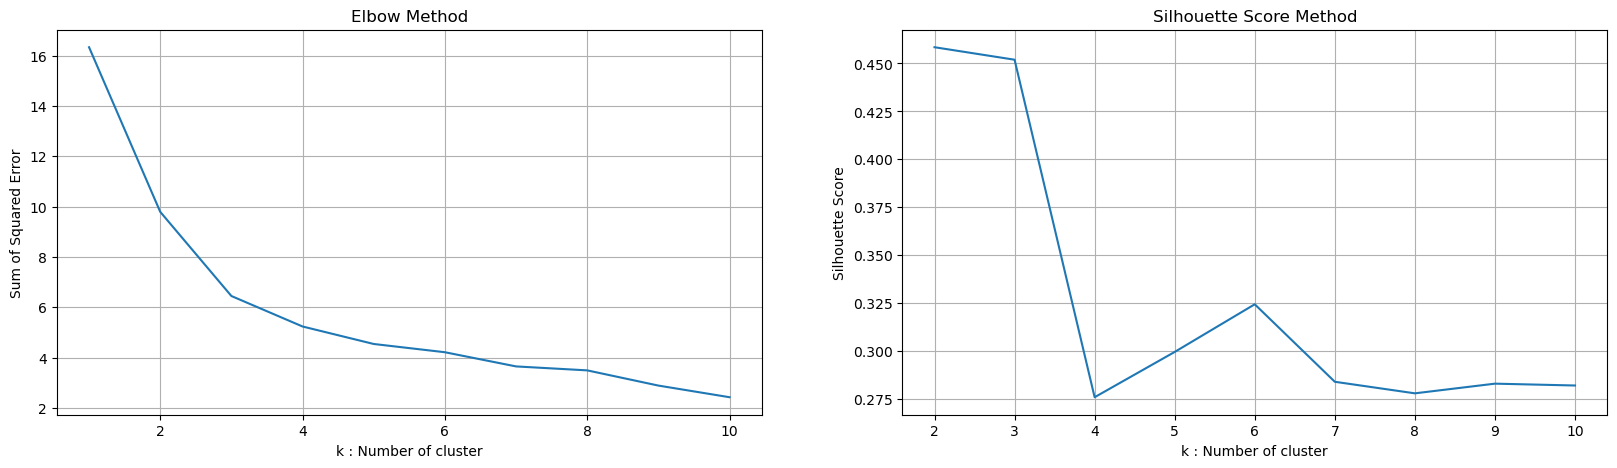

In [20]:
kmax = 10 
sse = [0] * kmax
sil = []
fig = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

fig = plt.subplot(1,2,1)
for k in range(1, kmax+1):
    kmeans = KMeans(n_clusters= k , max_iter= 1000)
    kmeans.fit(x1)
    sse[k-1] = kmeans.inertia_
sns.lineplot(x = range(1 , kmax+1) , y = sse[:])
plt.title("Elbow Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

plt.subplot(1,2,2)
for k in range(2 , kmax +1):
    kmeans = KMeans(n_clusters= k , max_iter= 1000)
    kmeans.fit(x1)
    labels = kmeans.labels_
    sil.append(silhouette_score(x1, labels, metric="euclidean"))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title("Silhouette Score Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

- Bằng phương pháp khủy tay và độ phân biệt thì k = 3 có thể phân biệt rõ các cụm nên chọn k = 3

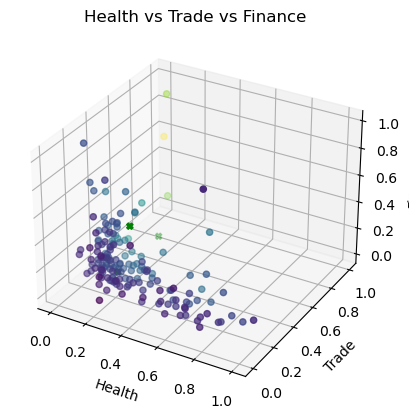

In [21]:
model = KMeans(n_clusters= 3 , max_iter=1000 , random_state=42)
model.fit(x1)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df['Class'] = labels 
df1['Class'] = labels 

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
x = np.array(df1["Health"])
y = np.array(df1["Trade"])
z = np.array(df1["Finance"])
ax.scatter3D(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color="g")
ax.scatter3D(x, y, z, c=y)
plt.title("Health vs Trade vs Finance")
ax.set_xlabel("Health")
ax.set_ylabel("Trade")
ax.set_zlabel("Finance")
plt.show()

- Không xác định được 
- Vẽ tỷ lệ tử vong và thu nhập để phân cụm

Text(0.5, 1.0, 'income vs class')

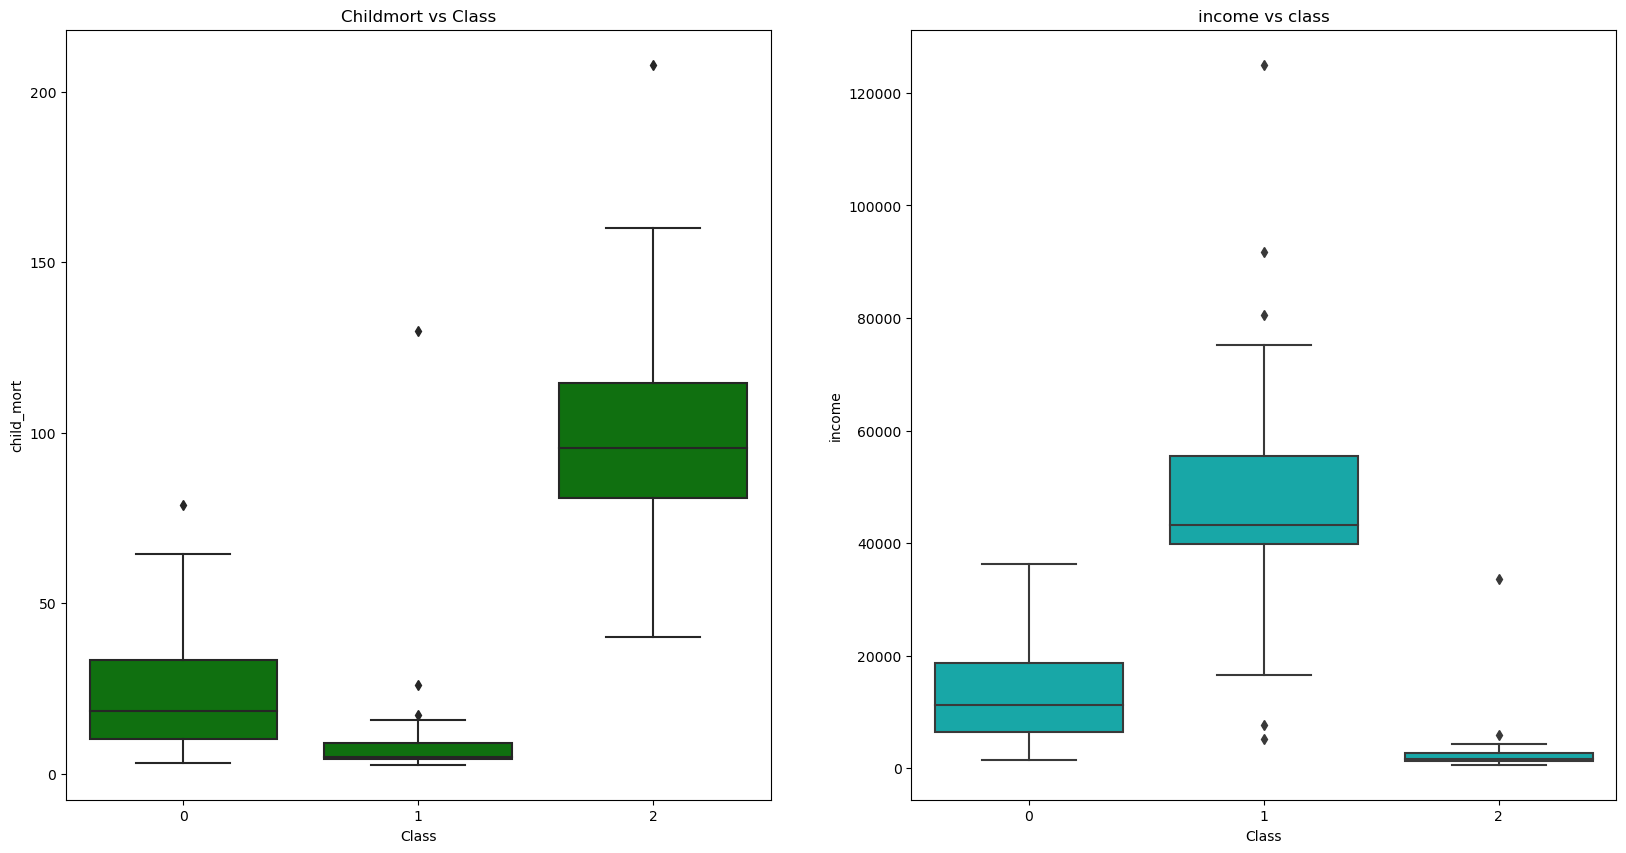

In [22]:
fig , ax = plt.subplots(1 , 2 , figsize = (20,10))

plt.subplot(1,2,1)
sns.boxplot(x = 'Class' , y = 'child_mort' , data = df , color = 'g')
plt.title('Childmort vs Class')

plt.subplot(1,2,2)
sns.boxplot(x = 'Class' , y = 'income' , data = df , color = 'c')
plt.title('income vs class')

# Từ biểu đồ trên 
- 0 : Có thể cần hộ trợ nếu đủ ngân sách  
- 1 : Cần hộ trợ tỷ lệ thu nhập thấp và tỉ lệ trẻ tư vong rất cao 
- 2 :  Không cần phải hỗ trợ 

In [23]:
df1['Class'].loc[df1['Class'] == 0] = 'Can Need Help'
df1['Class'].loc[df1['Class'] ==1] = 'Need Help'
df1['Class'].loc[df1['Class'] ==2] = 'No help' 

In [24]:
df1['Class'].value_counts()

Class
Can Need Help    102
No help           36
Need Help         29
Name: count, dtype: int64

# PCA vs KMeans

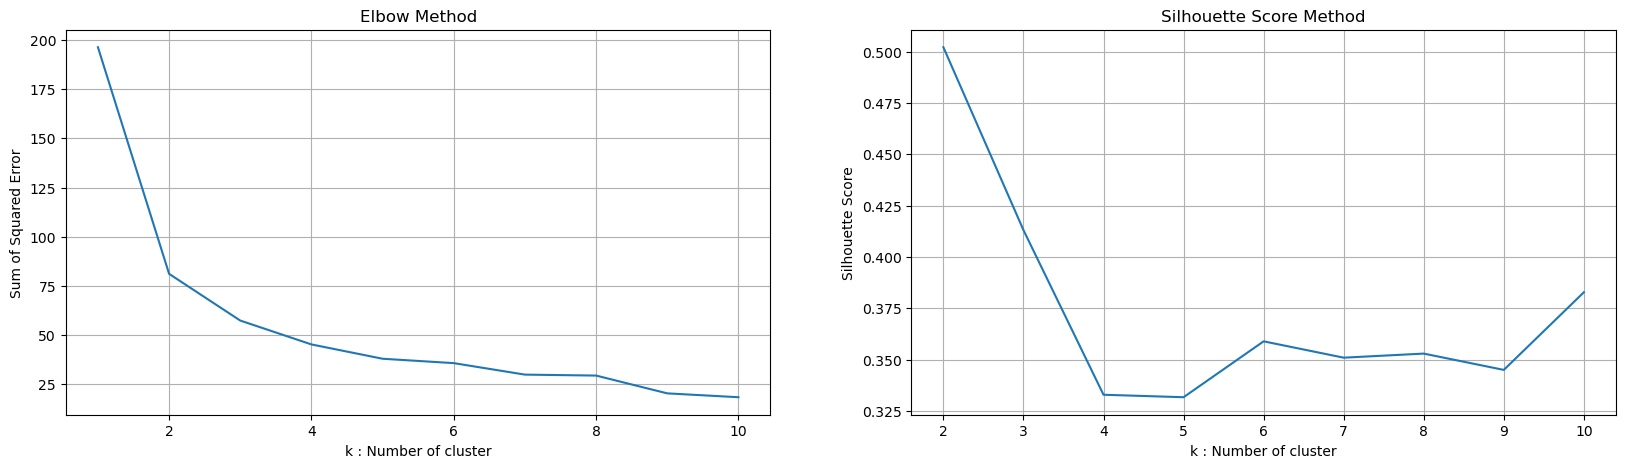

In [25]:
kmax = 10 
sse = [0] * kmax
sil = []
fig = plt.subplots(1,2 , figsize = (20,5))

plt.subplot(1,2,1)
for k in range(1,kmax+1): 
    kmeans = KMeans(n_clusters= k , max_iter = 1000)
    kmeans.fit(x2)
    sse[k-1] = kmeans.inertia_
sns.lineplot(x = range(1 , kmax+1) , y = sse[:])
plt.title("Elbow Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

plt.subplot(1,2,2)
for k in range(2 , kmax+1):
    kmeans = KMeans(n_clusters= k , max_iter= 1000)
    kmeans.fit(x2)
    labels = kmeans.labels_
    sil.append(silhouette_score(x2 , labels , metric= 'euclidean'))
sns.lineplot(x=range(2, kmax + 1), y=sil)
plt.title("Silhouette Score Method")
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()


- Chọn k = 3 từ kết quả của số cụm trên 

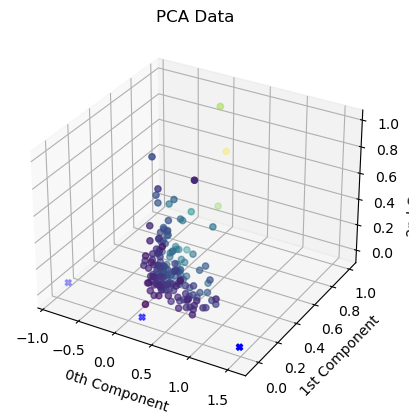

In [26]:
model = KMeans(n_clusters=3, max_iter=1000 , random_state= 42)
model.fit(x2)
cluster = model.cluster_centers_
centroids = np.array(cluster)
labels = model.labels_
df["Class"] = labels
pca_df2["Class"] = labels

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(centroids[:, 0], centroids[:, 1], centroids[:, 2], marker="X", color="b")
plt.title("PCA Data")
ax.set_xlabel("0th Component")
ax.set_ylabel("1st Component")
ax.set_zlabel("2nd Component")
ax.scatter(x, y, z, c=y)
plt.show()

- Không phân biệt được cụm nào với cụm nào vẽ child_mort và income để gán cụm

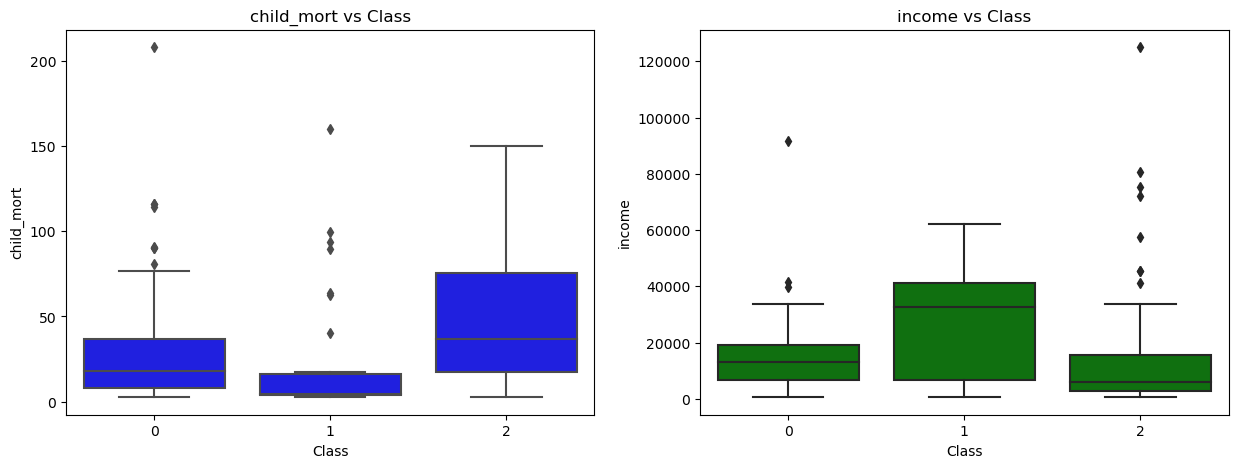

In [27]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=df, color="b" )
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=df, color="g" )
plt.title("income vs Class")

plt.show()  

# Từ biểu đồ trên 
- 0 : Có thể cần hộ trợ nếu đủ ngân sách  
- 1 :  Không cần phải hỗ trợ 
- 2 :  Cần hộ trợ tỷ lệ thu nhập thấp và tỉ lệ trẻ tư vong rất cao

In [28]:
pca_df2 = df[['country']].merge(pca_df2 , left_index= True , right_index= True)

pca_df2["Class"].loc[pca_df2["Class"] == 0] = "Can Need Help"
pca_df2["Class"].loc[pca_df2["Class"] == 1] = "No Help Need"
pca_df2["Class"].loc[pca_df2["Class"] == 2] = "Help Needed"


In [29]:
pca_df2['Class'].value_counts()

Class
Help Needed      72
Can Need Help    62
No Help Need     33
Name: count, dtype: int64

# Apply Hierarchical Clustering

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

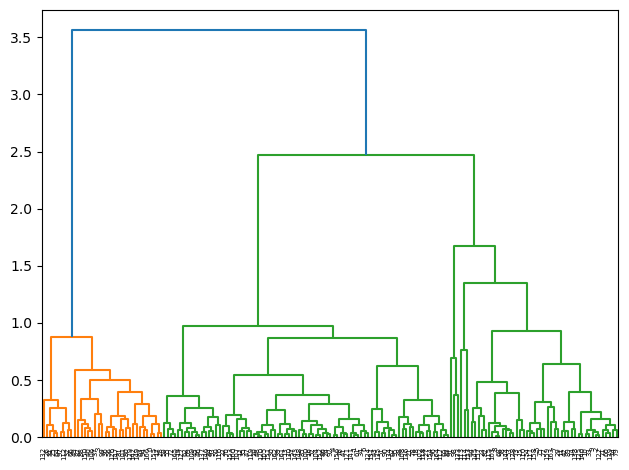

In [31]:
linkage_df = linkage(x1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_df)
plt.tight_layout()
plt.show()

- Chọn k = 3

In [32]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering(
    n_clusters=3, linkage="ward", metric="euclidean"
)
labels = hierarchical_cluster.fit(x1)

pred_agc = pd.Series(hierarchical_cluster.labels_)
df["Class"] = pred_agc
df1["Class"] = pred_agc

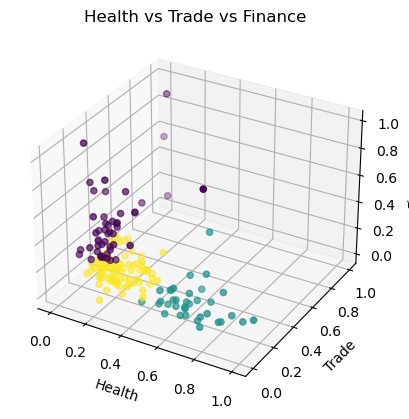

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
x = np.array(df1['Health'])
y = np.array(df1['Trade'])
z = np.array(df1['Finance'])
ax.scatter(x,y,z,c = df1['Class'])
plt.title('Health vs Trade vs Finance')
ax.set_xlabel('Health')
ax.set_ylabel('Trade')
ax.set_zlabel('Finance')
plt.show()

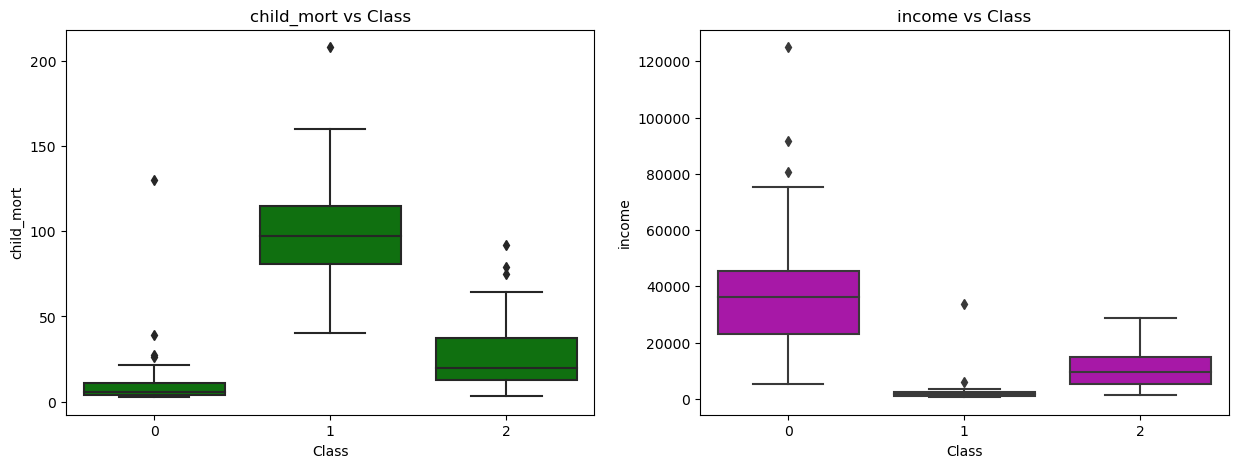

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=df, color="g")
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=df, color="m")
plt.title("income vs Class")

plt.show()

# Từ biểu đồ trên 
- 0 : Không cần phải hỗ trợ 
- 1 : Cần hộ trợ tỷ lệ thu nhập thấp và tỉ lệ trẻ tư vong rất cao 
- 2 : Có thể cần hộ trợ nếu đủ ngân sách

In [35]:
df1['Class'].loc[df1['Class'] == 0] = 'No help'
df1['Class'].loc[df1['Class'] ==1] = 'Need Help'
df1['Class'].loc[df1['Class'] ==2] = 'Can Need Help' 

# Appy vs PCA

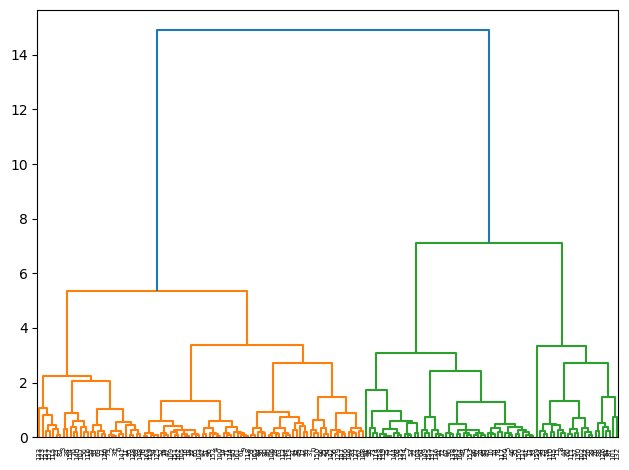

In [36]:
linkage_df = linkage(x2 , method = 'ward' , metric = 'euclidean')
dendrogram(linkage_df)
plt.tight_layout()
plt.show()

- Chọn k = 4

In [37]:
from sklearn.cluster import AgglomerativeClustering

hierarchical_cluster = AgglomerativeClustering( n_clusters=4, linkage="ward", metric="euclidean")
labels = hierarchical_cluster.fit(x2)

pred_agc = pd.Series(hierarchical_cluster.labels_)

df["Class"] = pred_agc
pca_df2["Class"] = pred_agc

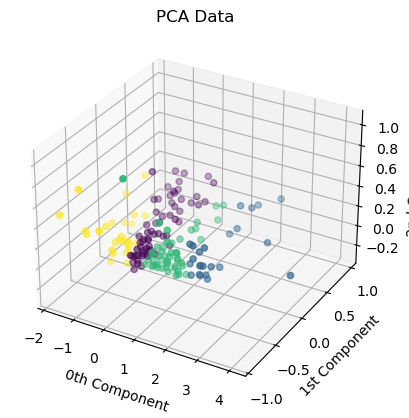

In [38]:
fig = plt.figure()

ax = fig.add_subplot(111 , projection= '3d')
x = np.array(pca_df2[0])
y = np.array(pca_df2[1])
z = np.array(pca_df2[2])
ax.scatter(x,y,z,c = pca_df2['Class'])
plt.title('PCA Data')
ax.set_xlabel('0th Component')
ax.set_ylabel('1st Component')
ax.set_zlabel('2nd Component')
plt.show();

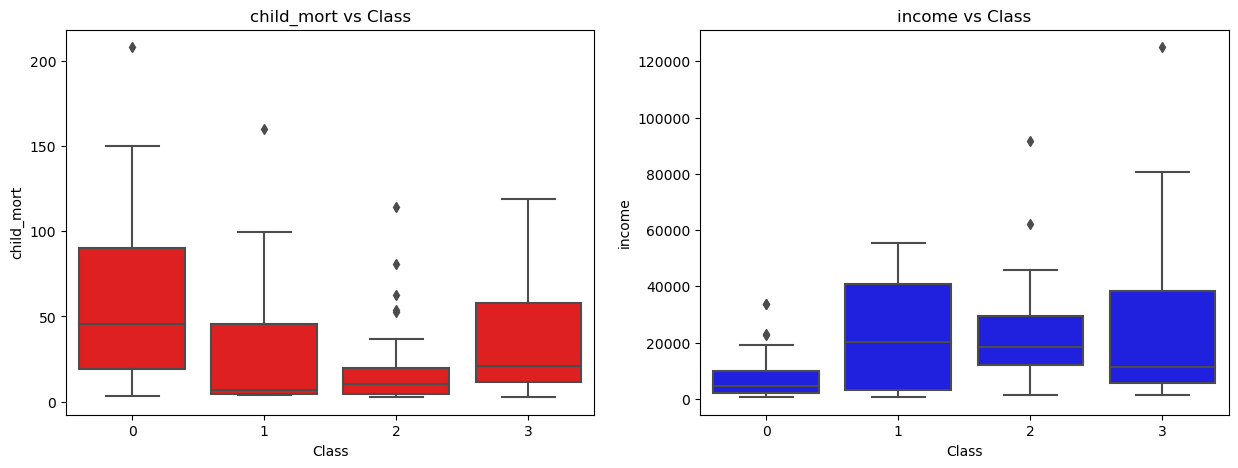

In [39]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x="Class", y="child_mort", data=df, color='r')
plt.title("child_mort vs Class")

plt.subplot(1, 2, 2)
sns.boxplot(x="Class", y="income", data=df, color='b')
plt.title("income vs Class")

plt.show()

# Từ biểu đồ trên 
- 0 :  cần phải hỗ trợ 
- 2 : Có thể cần hộ trợ nếu đủ ngân sách
- 1 , 3 : Không cần phải hỗ trợ 

In [40]:
pca_df2["Class"].loc[pca_df2["Class"] == 0] = " Help Need"
pca_df2["Class"].loc[pca_df2["Class"] == 2] = "Can Need Help"
pca_df2["Class"].loc[(pca_df2["Class"] == 1) | (pca_df2["Class"] == 3)] = "No Help Need"


In [41]:
pca_df2.Class.value_counts()

Class
 Help Need       64
No Help Need     54
Can Need Help    49
Name: count, dtype: int64